# Week 2

## The neuron

![The neuron](./neuron.png)

## The perceptron

![The perceptron](./perceptron.png)

## Import libraries

- `random` is used to generate random numbers to pick random rows to train the perceptron
- `matplotlib` is used for plotting

In [16]:
import random
import matplotlib.pyplot as plot

## Define variables

- `dataset`, the data of the OR function (false=-1, true=+1)
- `learning_rate`, e.g. the total change made while learning. The usage of it is described [here](https://en.wikipedia.org/wiki/Delta_rule)
- `weights`, the importance of specified input where `b` is the bias, the constant that is injected into the sum
- `epochs`, the maximum number of training iterations
- `activation`, the activation function, here the step function

In [17]:
dataset = [ 
    {'x1': 0, 'x2': 0, 'output': 0 },
    {'x1': 0, 'x2': 1, 'output': 1 },
    {'x1': 1, 'x2': 0, 'output': 1 },
    {'x1': 1, 'x2': 1, 'output': 1 },
]
learning_rate = 0.1
weights = { 'w0': -1, 'w1': 0, 'w2': -1 }
epochs = 100
activation = lambda s: 1 if s >= 0 else 0

## Define the function that computes the output of the perceptron


In [18]:
def output(row, weights):
    z = 1 * weights['w0'] + row['x1'] * weights['w1'] + row['x2'] * weights['w2']
    return activation(z)

## Define the function to plot the weights and the dataset

In [19]:
def figure(iteration, old_weights, new_weights, previous_row):
    # start a new figure
    plot.figure(iteration)
    plot.axis([-3, 4, -3, 4])
    plot.title(f"epoch={iteration + 1:03d} w0={new_weights['w0']:+.1f} w1={new_weights['w1']:+.1f} w2={new_weights['w2']:+.1f}")

    # plot the new weights
    new_xs = [-3, +4]
    new_ys = [(0 - new_weights['w1'] * x - new_weights['w0']) / new_weights['w2'] for x in new_xs]
    plot.plot(new_xs, new_ys, color='green')

    # plot the old weights
    old_xs = [-3, +4]
    old_ys = [(0 - old_weights['w1'] * x - old_weights['w0']) / old_weights['w2'] for x in old_xs]
    plot.plot(old_xs, old_ys, color='grey', alpha=0.5)
    output_above = output({'x1': 0.5, 'x2': 100}, old_weights)
    plot.fill_between(old_xs, old_ys, 4, color='red' if output_above == 1 else 'blue', alpha=0.05)
    plot.fill_between(old_xs, old_ys, -3, color='blue' if output_above == 1 else 'red', alpha=0.05)

    # plot the dataset
    for row in dataset:
        plot.plot(row['x1'], row['x2'], marker='o', color='red' if row["output"] == 1 else 'blue', markersize=20 if row == previous_row else 10)
    plot.tight_layout()

## Train the perceptron

epoch=000 w0=-1.0 w1=+0.0 w2=-1.0 Wrong=3 x1=0 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=001 w0=-0.9 w1=+0.0 w2=-0.9 Wrong=3 x1=0 x2=0 output=0 actual=0 error=+0 Ok=True
epoch=002 w0=-0.9 w1=+0.0 w2=-0.9 Wrong=3 x1=0 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=003 w0=-0.8 w1=+0.0 w2=-0.8 Wrong=3 x1=1 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=004 w0=-0.7 w1=+0.1 w2=-0.7 Wrong=3 x1=1 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=005 w0=-0.6 w1=+0.2 w2=-0.6 Wrong=3 x1=1 x2=0 output=1 actual=0 error=+1 Ok=False
epoch=006 w0=-0.5 w1=+0.3 w2=-0.6 Wrong=3 x1=1 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=007 w0=-0.4 w1=+0.4 w2=-0.5 Wrong=3 x1=1 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=008 w0=-0.3 w1=+0.5 w2=-0.4 Wrong=2 x1=1 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=009 w0=-0.2 w1=+0.6 w2=-0.3 Wrong=1 x1=0 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=010 w0=-0.1 w1=+0.6 w2=-0.2 Wrong=1 x1=0 x2=1 output=1 actual=0 error=+1 Ok=False
epoch=011 w0=-0.0 w1=+0.6 w2=-0.1

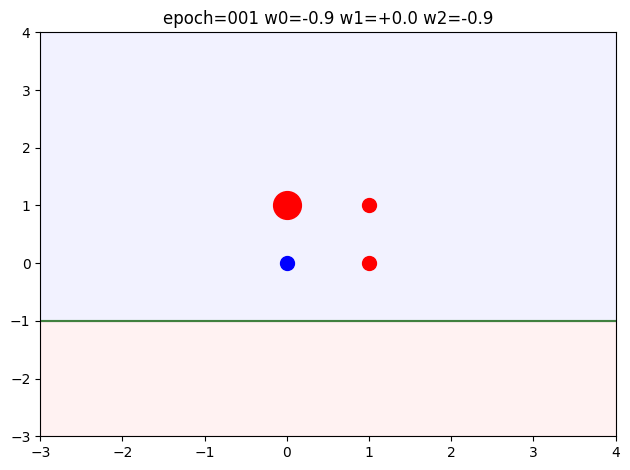

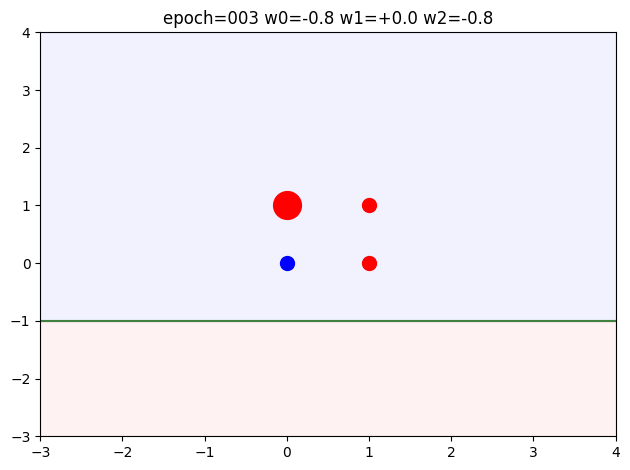

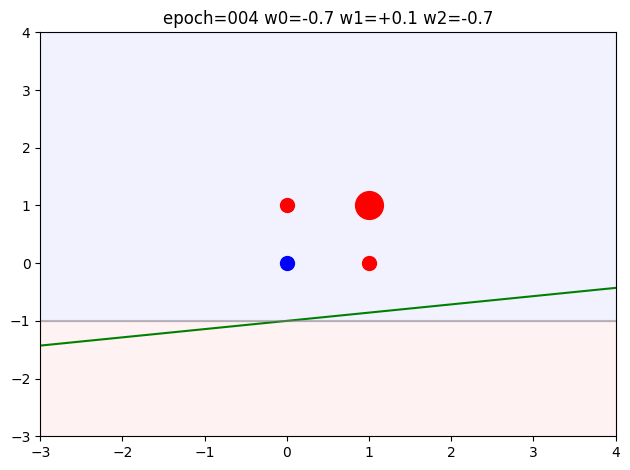

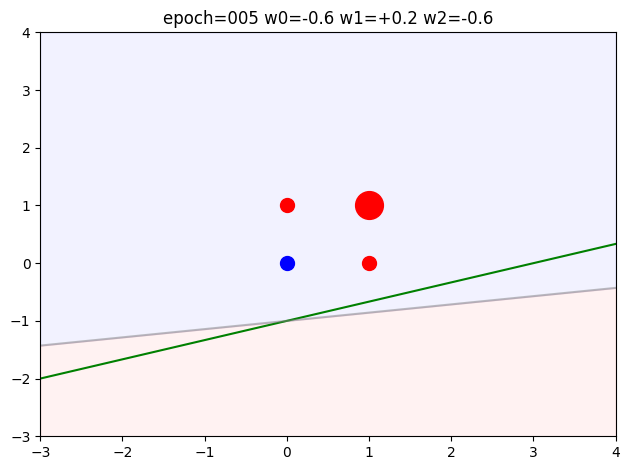

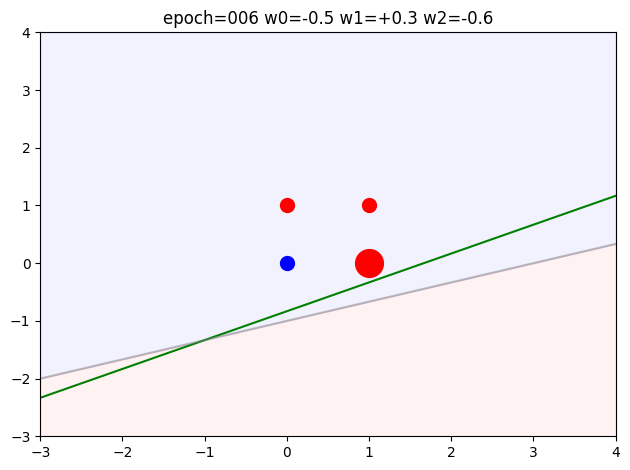

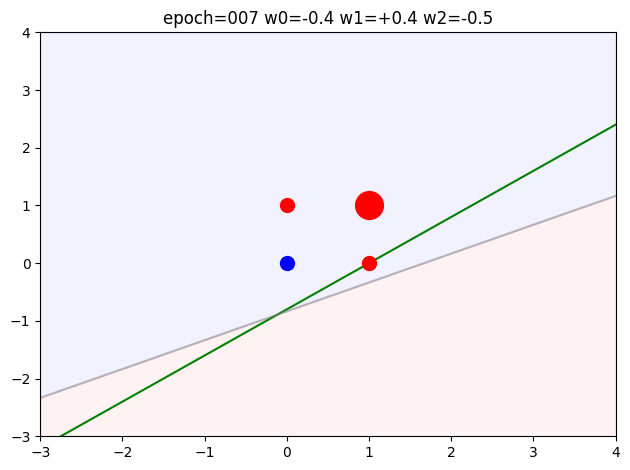

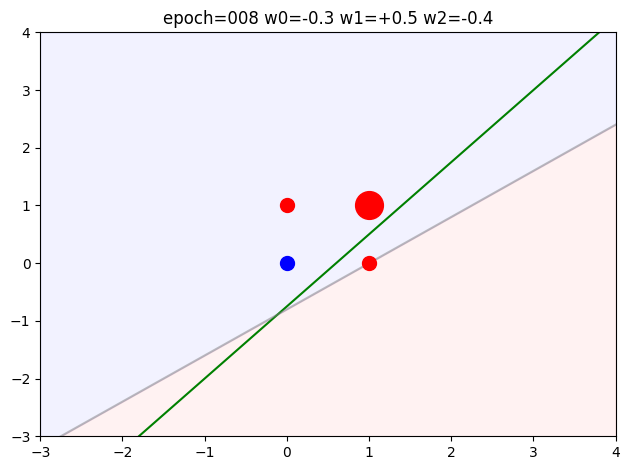

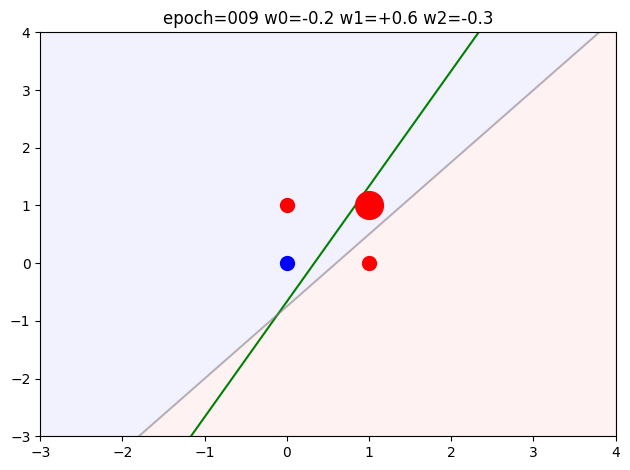

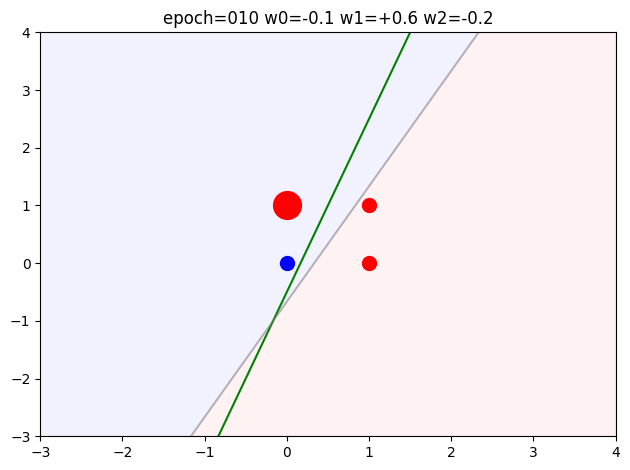

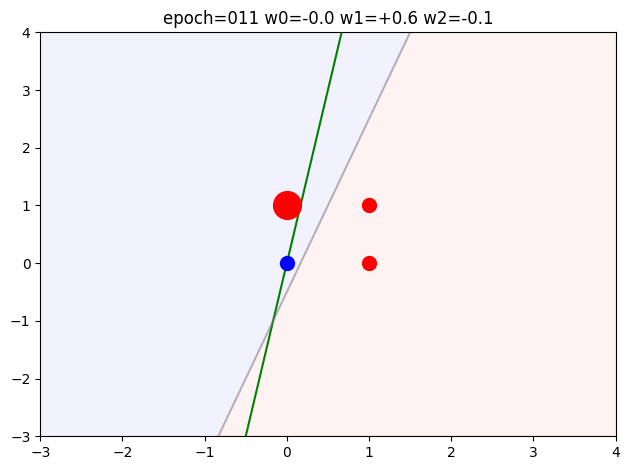

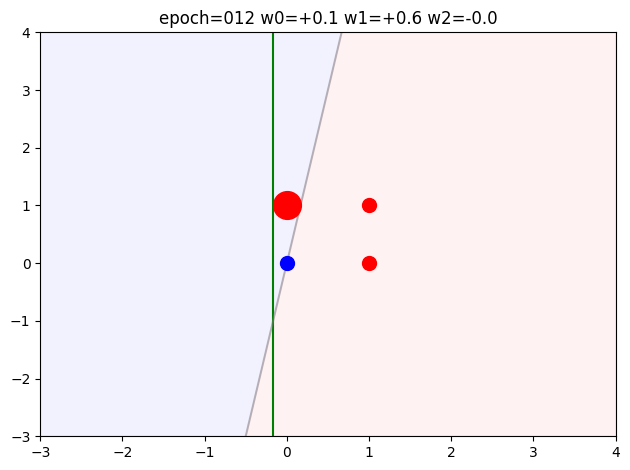

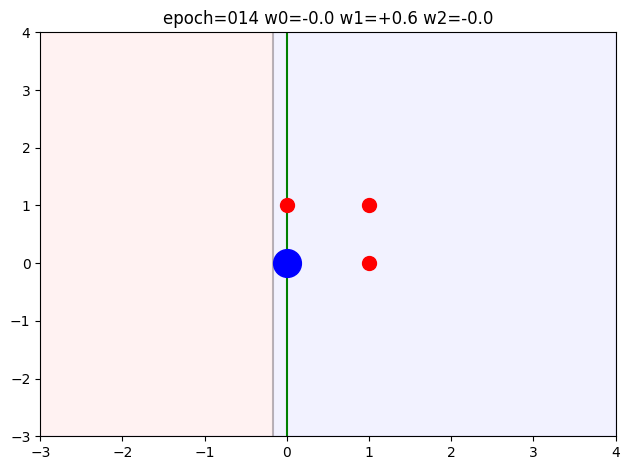

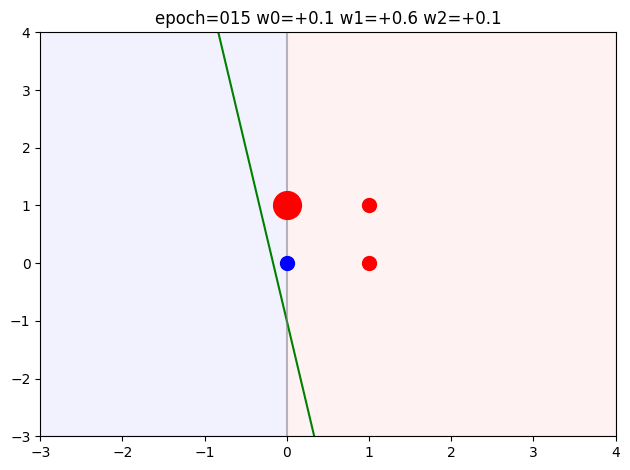

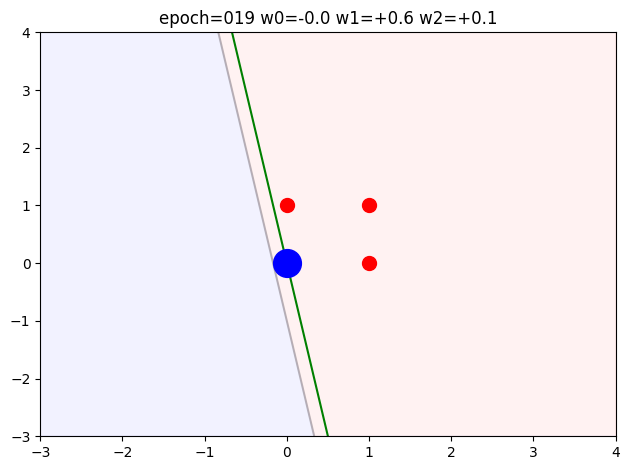

In [20]:
for epoch in range(epochs):
    print(f"epoch={epoch:03d}", end=" ")
    print(f"w0={weights['w0']:+.1f} w1={weights['w1']:+.1f} w2={weights['w2']:+.1f}", end=" ")

    # compute the number of wrong outputs
    wrong = sum([row["output"] != output(row, weights) for row in dataset])
    print(f"Wrong={wrong}", end=" ")
    if wrong == 0:
        break

    # pick a random row
    row = random.choice(dataset)
    actual = output(row, weights)
    error = row["output"] - actual
    ok = row["output"] == actual
    print(f"x1={row['x1']} x2={row['x2']} output={row['output']} actual={actual} error={error:+1d} Ok={ok}")
    
    # update the weights
    if not ok:
        previous_weights = dict(weights)
        weights['w0'] += learning_rate * error * 1
        weights['w1'] += learning_rate * error * row['x1']
        weights['w2'] += learning_rate * error * row['x2']
        figure(epoch, previous_weights, weights, row)
